In [1]:
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Read in csv of Toy Dataset
df = pd.read_csv('toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Basic Exploratory Data Analysis and Data Cleaning

## Check shape 

In [2]:
df.shape

(150000, 6)

## Check if missing values (null) are present 

In [3]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Check for basic information of our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## Check if NA values are present in dataframe

In [5]:
print(df.isna())

        Number   City  Gender    Age  Income  Illness
0        False  False   False  False   False    False
1        False  False   False  False   False    False
2        False  False   False  False   False    False
3        False  False   False  False   False    False
4        False  False   False  False   False    False
...        ...    ...     ...    ...     ...      ...
149995   False  False   False  False   False    False
149996   False  False   False  False   False    False
149997   False  False   False  False   False    False
149998   False  False   False  False   False    False
149999   False  False   False  False   False    False

[150000 rows x 6 columns]


## Removing trailing and ending spaces if present


In [6]:
# We can remove any ussless whitespaces if present for example:
df['City'].str.strip()
df['Gender'].str.strip()
df['Illness'].str.strip()

0         No
1         No
2         No
3         No
4         No
          ..
149995    No
149996    No
149997    No
149998    No
149999    No
Name: Illness, Length: 150000, dtype: object

## Check for duplicates in dataframe

In [7]:
duplicate_rows = df.duplicated()
print(duplicate_rows)
# No duplicates found to remove then we would do: df.drop_duplicates(inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Length: 150000, dtype: bool


## Check if there is no negative Age and Income values in dataframe

In [8]:
negative_ages = (df['Age'] < 0).any()

if negative_ages:
    print("There are negative ages in the 'Age' column.")
else:
    print("There are no negative ages in the 'Age' column.")

There are no negative ages in the 'Age' column.


In [9]:
negative_incomes = (df['Income'] < 0).any()

if negative_ages:
    print("There are negative incomes in the 'Income' column.")
else:
    print("There are no negative incomes in the 'Income' column.")

There are no negative incomes in the 'Income' column.


## Check now basic statistic data of our dataframe

In [10]:
# Basic data description
df.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [11]:
# Confirming via Numpy
mean_income_numpy = np.mean(df['Income'])
mean_age_numpy = np.mean(df['Age'])

print("Mean Income using NumPy {:.3f}".format(mean_income_numpy))
print("Mean Age using NumPy {:.3f}".format(mean_age_numpy))

Mean Income using NumPy 91252.798
Mean Age using NumPy 44.950


## Checking distributions

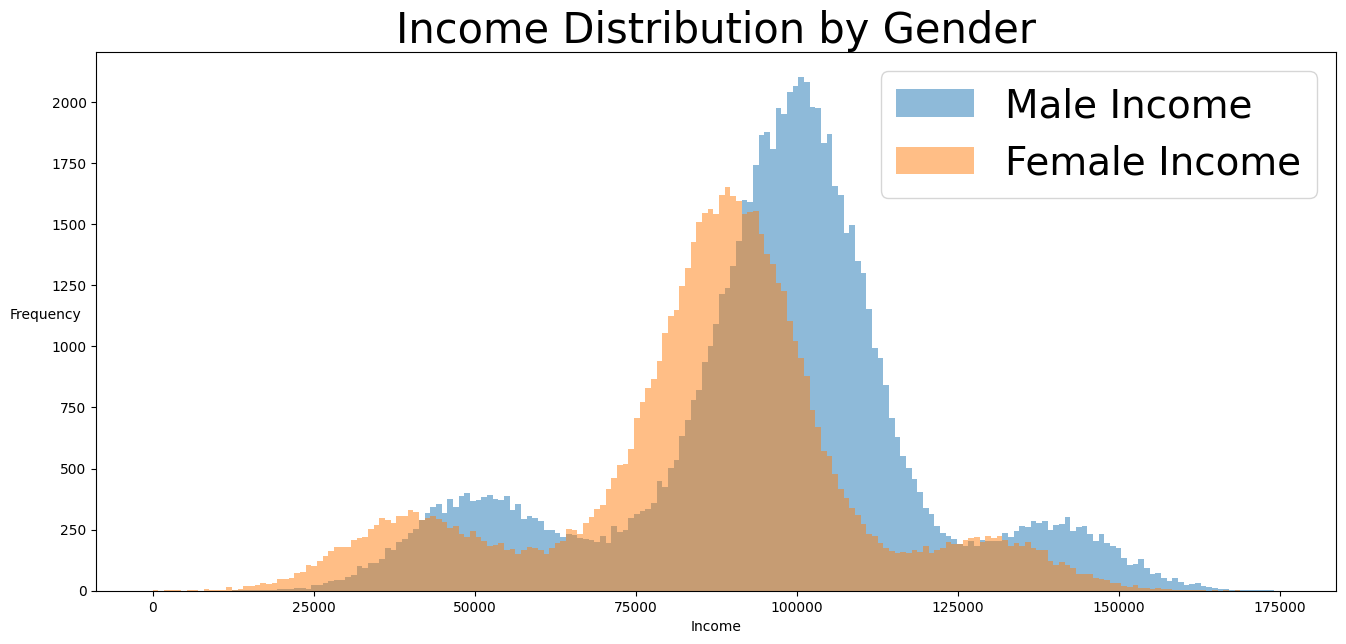

In [12]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

x = pd.Series(male_df['Income'])
y = pd.Series(female_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Male Income')
plt.hist(y, bins, alpha=0.5, label='Female Income')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by Gender')


plt.show()

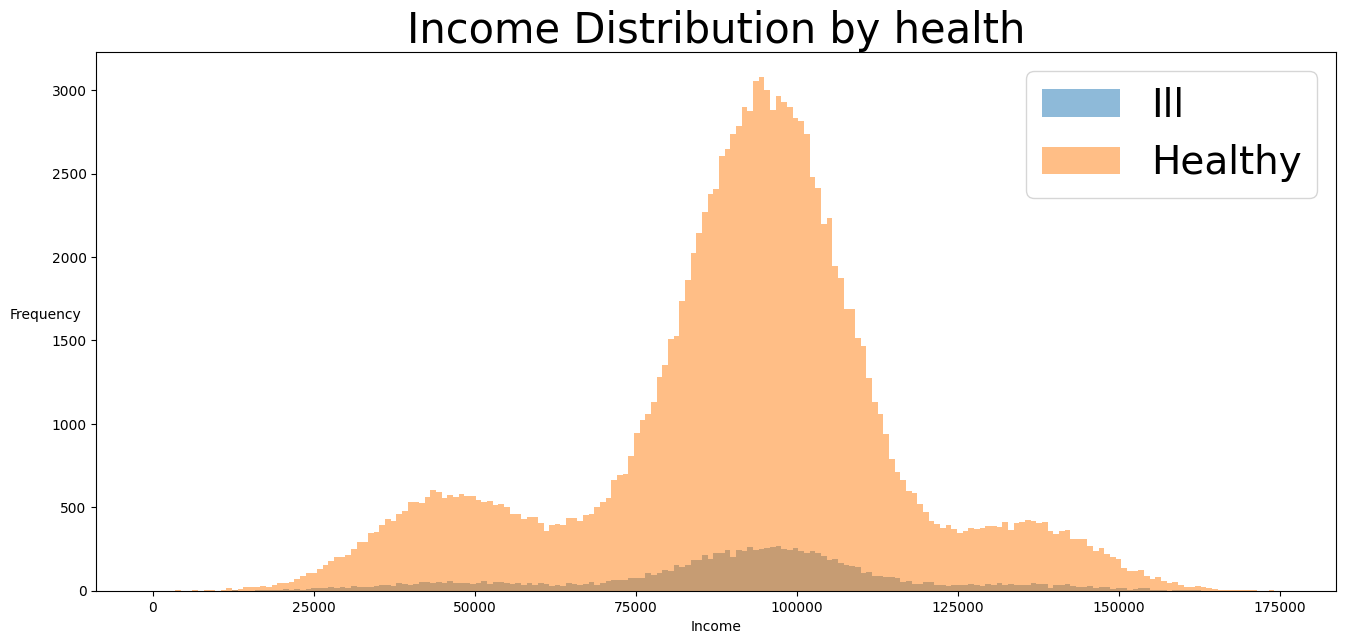

In [13]:
# EDA - healthy vs. ill income distribution
ill = df[df['Illness'] == 'Yes']
healthy = df[df['Illness'] == 'No']

x = pd.Series(ill['Income'])
y = pd.Series(healthy['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Ill')
plt.hist(y, bins, alpha=0.5, label='Healthy')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by health')


plt.show()

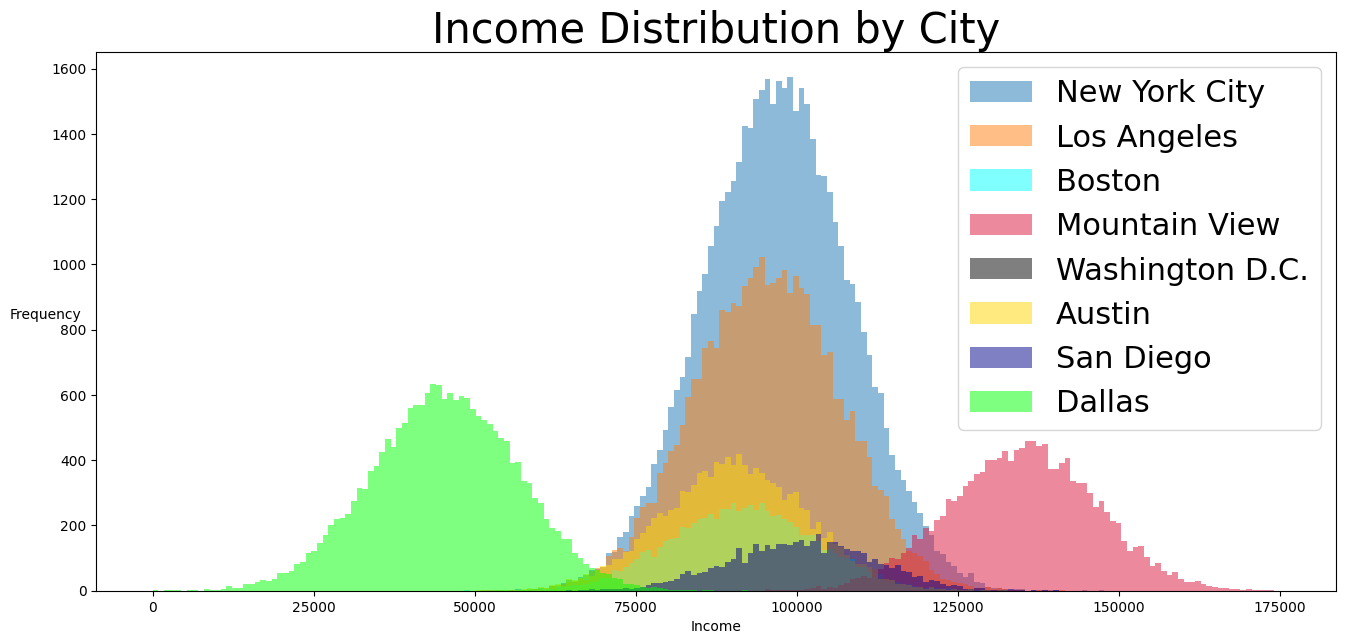

In [14]:
new_df = df[df['City'] == 'New York City']
los_df = df[df['City'] == 'Los Angeles']
bos_df = df[df['City'] == 'Boston']
moun_df = df[df['City'] == 'Mountain View']
wash_df = df[df['City'] == 'Washington']
aus_df = df[df['City'] == 'Austin']
san_df = df[df['City'] == 'San Diego']
dal_df = df[df['City'] == 'Dallas']

a = pd.Series(new_df['Income'])
b = pd.Series(los_df['Income'])
c = pd.Series(bos_df['Income'])
d = pd.Series(moun_df['Income'])
e = pd.Series(wash_df['Income'])
f = pd.Series(aus_df['Income'])
g = pd.Series(san_df['Income'])
h = pd.Series(dal_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(a, bins, alpha=0.5, label='New York City')
plt.hist(b, bins, alpha=0.5, label='Los Angeles')
plt.hist(c, bins, alpha=0.5, label='Boston', color='cyan')
plt.hist(d, bins, alpha=0.5, label='Mountain View', color='crimson')
plt.hist(e, bins, alpha=0.5, label='Washington D.C.', color='Black')
plt.hist(f, bins, alpha=0.5, label='Austin', color='Gold')
plt.hist(g, bins, alpha=0.5, label='San Diego', color='DarkBlue')
plt.hist(h, bins, alpha=0.5, label='Dallas', color='Lime')
plt.legend(loc='upper right', prop={'size' : 22})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.title('Income Distribution by City')

plt.show()

<Axes: title={'center': 'City Counts'}, ylabel='City'>

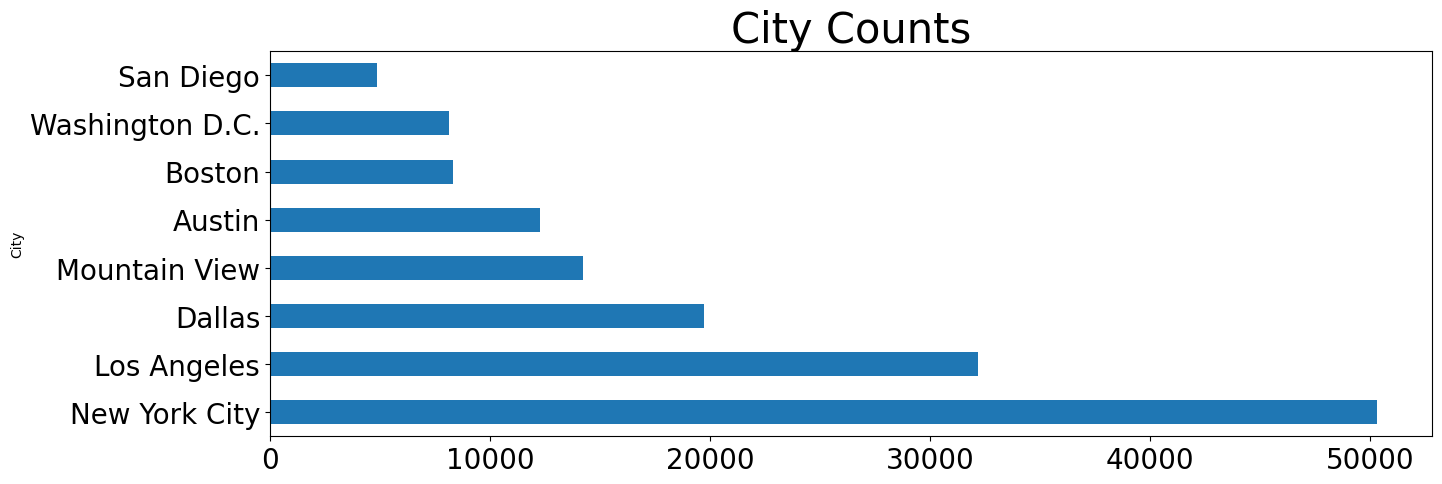

In [15]:
# df['City'].value_counts() returns the counts of each city
df['City'].value_counts().plot(kind='barh', 
                               rot=0, 
                               title='City Counts', 
                               figsize=(15,5))

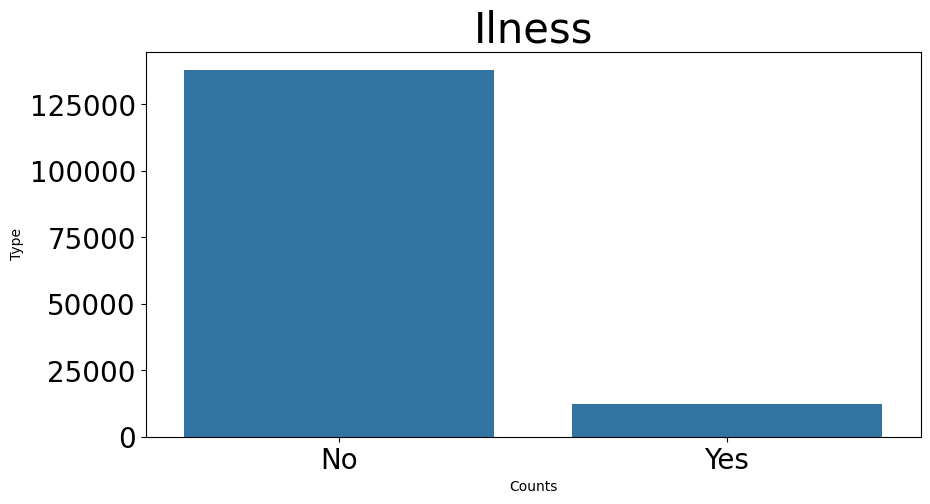

In [16]:
rcParams['figure.figsize'] = 10,5
sns.barplot(x = df['Illness'].value_counts().index, y = df['Illness'].value_counts().values)
plt.title('Ilness')
plt.xlabel('Counts')
plt.ylabel('Type')
plt.show()

## Scaling (normalizing) numerical data - it is often done in ML because during training it is easier for model to converge to global optima of our cost function

In [17]:
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'Income']
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['scaled_age', 'scaled_income'])

# Append scaled values to the original DataFrame
df = pd.concat([df, scaled_df], axis=1)

print(df)

        Number    City  Gender  Age    Income Illness  scaled_age  \
0            1  Dallas    Male   41   40367.0      No       0.400   
1            2  Dallas    Male   54   45084.0      No       0.725   
2            3  Dallas    Male   42   52483.0      No       0.425   
3            4  Dallas    Male   40   40941.0      No       0.375   
4            5  Dallas    Male   46   50289.0      No       0.525   
...        ...     ...     ...  ...       ...     ...         ...   
149995  149996  Austin    Male   48   93669.0      No       0.575   
149996  149997  Austin    Male   25   96748.0      No       0.000   
149997  149998  Austin    Male   26  111885.0      No       0.025   
149998  149999  Austin    Male   25  111878.0      No       0.000   
149999  150000  Austin  Female   37   87251.0      No       0.300   

        scaled_income  
0            0.230700  
1            0.257228  
2            0.298840  
3            0.233928  
4            0.286501  
...               ...  
149

In [18]:
df.head()

,Number,City,Gender,Age,Income,Illness,scaled_age,scaled_income
0,1,Dallas,Male,41,40367.0,No,0.400,0.230700
1,2,Dallas,Male,54,45084.0,No,0.725,0.257228
2,3,Dallas,Male,42,52483.0,No,0.425,0.298840
3,4,Dallas,Male,40,40941.0,No,0.375,0.233928
4,5,Dallas,Male,46,50289.0,No,0.525,0.286501


# Hypothesis testing


In [19]:
los_angeles_incomes = df[df['City'] == 'Los Angeles'].Income
nyc_incomes = df[df['City'] == 'New York City'].Income

print(los_angeles_incomes.head())
print(nyc_incomes.head())

70014    102868.0
70015    107446.0
70016    107891.0
70017     87469.0
70018     86483.0
Name: Income, dtype: float64
19707    112226.0
19708    110534.0
19709    100665.0
19710     98147.0
19711     93100.0
Name: Income, dtype: float64


In [20]:
print(los_angeles_incomes.mean())
print(nyc_incomes.mean())

95264.15540981568
96857.13139324548


In [21]:
print(los_angeles_incomes.std())
print(nyc_incomes.std())

11187.23457991439
11210.580111095713


## Is there difference in incomes between NYC and LA?
Comparing two sample averages

H0: los_angeles_incomes = nyc_incomes

Ha: los_angeles_incomes <> nyc_incomes

if p < 0.05, then we reject NULL (there is a relationship between city and income)

else, you fail to reject the NULL (There is no relationship city and income)

In [22]:
import scipy.stats as stats
print(stats.ttest_ind(a = los_angeles_incomes, b = nyc_incomes, equal_var = False))

TtestResult(statistic=-19.93051635488548, pvalue=3.9331841109727816e-88, df=68654.48823313811)


# Interpretation

If we use a significance level equal to 0.05 then if p is less than that level we reject the null hypothesis. This means that at this significance level, there is a difference in income between NYC and LA cities

<center><img src="img\hypothesis.png" alt="Hypothesis graph" width="600"></center>

In [23]:
# Hypothesis testing links
# https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing 
# https://www.kaggle.com/code/victoriamiller19/hypothesis-testing-explanation#Statistical-Hypothesis-Testing
# one hot encoding links
# https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

# Dimensinality reduction PCA

Describing data by its mean and covariance matrix, two eigenvectors perpendicular to each other. The idea is that we can reperesent data with just one vector reducing the dimensinality of problem

In [24]:
df.drop(columns=['scaled_age', 'scaled_income'], inplace=True)
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Illness'] = label_encoder.fit_transform(df['Illness'])

# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ['Age', 'Income']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(columns=['Number']))

# Create a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components dataframe with the original dataframe
result_df = pd.concat([df[['Number', 'City', 'Gender', 'Illness']], pca_df], axis=1)

print(result_df)

        Number  City  Gender  Illness       PC1       PC2
0            1     2       1        0  1.920878 -0.308762
1            2     2       1        0  1.888468  0.810487
2            3     2       1        0  1.836020 -0.232260
3            4     2       1        0  1.916806 -0.395622
4            5     2       1        0  1.851594  0.115100
...        ...   ...     ...      ...       ...       ...
149995  149996     0       1        0  3.516748  0.243984
149996  149997     0       1        0  3.494029 -1.745552
149997  149998     0       1        0  3.388000 -1.671516
149998  149999     0       1        0  3.388000 -1.757903
149999  150000     0       0        0  3.567260 -0.696022

[150000 rows x 6 columns]


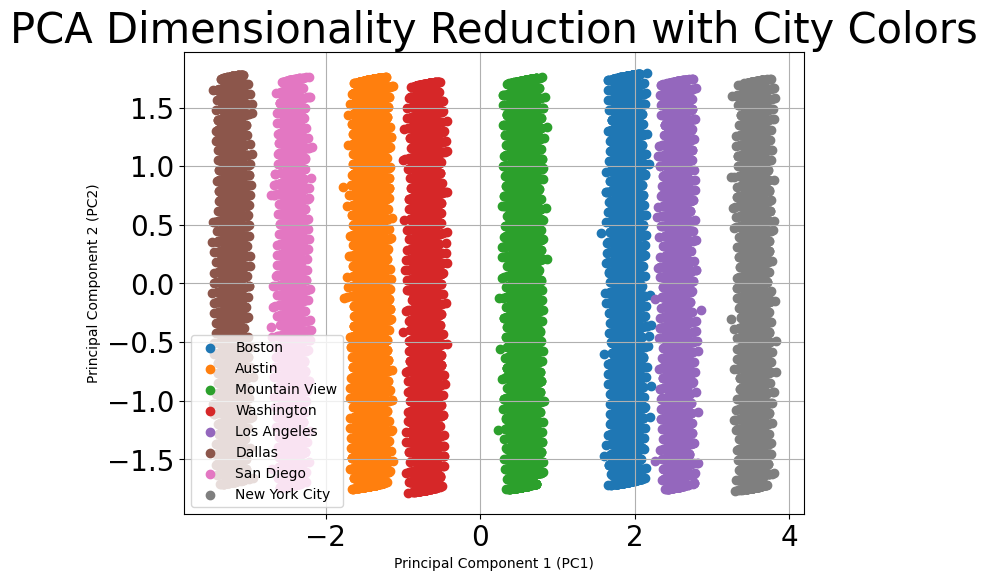

In [27]:
# Create a dictionary to map city codes to names
city_names = {0: 'New York City', 1: 'Los Angeles', 2: 'Boston', 3: 'Mountain View',4: 'Washington', 5: 'Austin', 6: 'San Diego', 7: 'Dallas'}

# Scatter plot of the principal components with color based on cities
plt.figure(figsize=(8, 6))
for city_code in result_df['City'].unique():
    city_name = city_names[city_code]
    city_data = result_df[result_df['City'] == city_code]
    plt.scatter(city_data['PC1'], city_data['PC2'], label=city_name)

plt.title('PCA Dimensionality Reduction with City Colors')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

# Linear regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataframe

df = pd.read_csv('toy_dataset.csv')
df.head()

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['City', 'Illness'])

# Convert gender to numerical values (if needed)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Split data into features and target variable
X = df.drop('Gender', axis=1)
y = df['Gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)


Training R^2 score: 0.19876351297267647
Testing R^2 score: 0.19068348743570918


As expected linear regression is pretty bad for predicting categorical variable. Linear regression is more suited for continuous target variables

In [29]:
df = pd.read_csv('toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Logistic regression

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# Do one-got enconding on categorical variables through sklearn transformer
categorical_cols = ['City', 'Illness']
numerical_cols = [col for col in df.columns if col not in ['City', 'Illness', 'Gender']]  # 'Gender' is the target variable
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols),
                  ('num', StandardScaler(), numerical_cols)],
    remainder='passthrough'
)

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Split data into features and target variable
X = df.drop('Gender', axis=1)
y = df['Gender']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print("Training accuracy:", train_score)
print("Testing accuracy:", test_score)

Training accuracy: 0.6963
Testing accuracy: 0.6925


As expected logistic regression is a lot better for this problem